In [13]:
%load_ext autoreload
%autoreload 2
import pickle
import pandas as pd
%matplotlib inline
from matplotlib.ticker import FuncFormatter 
import matplotlib
import matplotlib.pyplot as plt
import glob
from pdb import set_trace

def ts_plotter(self, ax, data1, data2):
    '''
    Helper for plotting panels in time series plot.
    '''

    out = ax.plot(data1, data2, linewidth=2)
    return out   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# **************
# GAME 1: LOGIC
# **************

## --- Read in data

# Random policy
df_r = pd.DataFrame() 
files = glob.glob("../data/logic_game/random/*.pkl") #random files
for file in files:
    df_r[file.split('/')[4].split('.')[0]] = pickle.load( open( file, "rb" ) )

# DQN with lr = 0.0025 and gamma = 0.999
df_dqn_lr00025_y999 = pd.DataFrame() 
files = glob.glob("../data/logic_game/dqn_lr00025_y99/*.pkl") #dqn, lr00025, y = 0.999
for file in files:
    df_dqn_lr00025_y999[file.split('/')[4].split('.')[0]] = pickle.load( open( file, "rb" ) )

# Self class
df_sc = pd.DataFrame() 
files = glob.glob("../data/logic_game/self_class/*.pkl") 
for file in files:
     df_sc[file.split('/')[4].split('.')[0]] = pickle.load( open( file, "rb" ) )

# Humans
df_hum = pd.DataFrame()
files = glob.glob("../data/logic_game/humans/*.pkl")
for file in files:
    df_hum[file.split('/')[4].split('.')[0]] = pickle.load( open( file, "rb" ) )

In [23]:
# **************
# GAME 1: LOGIC
# **************

## --- Get descriptive statistics

stats = pd.DataFrame() #for stats

# Random policy
stats['r_m'] = df_r.mean(axis=1)
stats['r_se'] = df_r.sem(axis=1)

# DQN with lr = 0.0025 and gamma = 0.999
stats['dqn_lr00025_y999_m'] = df_dqn_lr00025_y999.mean(axis=1)
stats['dqn_lr00025_y999_se'] = df_dqn_lr00025_y999.sem(axis=1)

# Self class
stats['sc_m'] = df_sc.mean(axis=1)
stats['sc_se'] = df_sc.sem(axis=1)

# Humans
stats['hum_m'] = df_hum.mean(axis=1)
stats['hum_se'] = df_hum.sem(axis=1)

# X, for plotting purposes
x = [i for i in range(1,99)]
stats['x'] = x

In [16]:
# Run this cell if you want to bin the data
stats = stats.groupby(stats.index // 5).mean().reset_index()
stats['x'] = stats.index

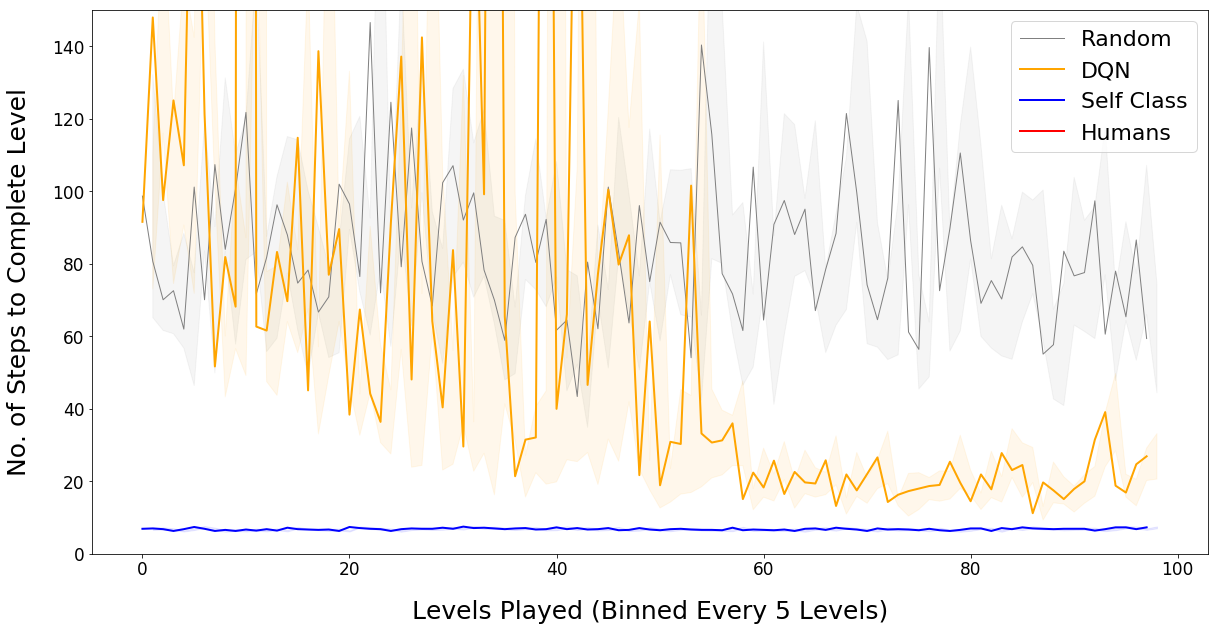

In [24]:
# **************
# GAME 1: LOGIC
# **************

## --- Plot descriptive statistics

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylim([0, 150]) #13 or 150
ax.xaxis.label.set_size(25)
ax.yaxis.label.set_size(25)
ax.set_xlabel(xlabel="Levels Played (Binned Every 5 Levels)", labelpad=21)
ax.set_ylabel(ylabel="No. of Steps to Complete Level", labelpad=21)
ax.tick_params(axis='both', which='major', labelsize=17)

# Random policy
r_l = ax.plot(stats.r_m, color='gray', linewidth=1, label='Random')
ax.fill_between(stats.x, stats.r_m - stats.r_se, stats.r_m + stats.r_se, alpha=0.08, color='gray')

# DQN with lr = 0.0025 and gamma = 0.999
dqn_l = ax.plot(stats.dqn_lr00025_y999_m, color='orange', linewidth=2, label='DQN')
ax.fill_between(stats.x, stats.dqn_lr00025_y999_m - stats.dqn_lr00025_y999_se, stats.dqn_lr00025_y999_m + stats.dqn_lr00025_y999_se, alpha=0.08, color='orange')

# Self class
sc_l = ax.plot(stats.sc_m, color='blue', linewidth=2, label='Self Class')
ax.fill_between(stats.x, stats.sc_m - stats.sc_se, stats.sc_m + stats.sc_se, alpha=0.08, color='blue')

# Humans
hum_l = ax.plot(stats.hum_m, color='red', linewidth=2, label='Humans')
ax.fill_between(stats.x, stats.hum_m - stats.hum_se, stats.hum_m + stats.hum_se, alpha=0.08, color='red')

first_legend = plt.legend(handles=[r_l[0], dqn_l[0], sc_l[0], hum_l[0]], loc='upper right', prop={'size': 22})

fig.savefig('effiency_curves.pdf', format='pdf')

In [2]:
# **************
# GAME 1: LOGIC
# **************

## --- Deeper dive into DQN: Individual DQNs

individual_dqns = df_dqn_lr00025_y999.groupby(df_dqn_lr00025_y999.index // 5).mean().reset_index()
individual_dqns = individual_dqns.drop(['index'], axis=1)
individual_dqns.plot(ylim=[0,200], figsize=[5,5])

NameError: name 'df_dqn_lr00025_y999' is not defined

In [3]:
# **************
# GAME 1: LOGIC
# **************

# Deeper dive into DQN: Comparing performance of different DQN hyperparameters

## --- (1) Read in data

# DQN, lr = 0.0005, y = 0.99
df_dqn_lr0005_y99 = pd.DataFrame()
files = glob.glob("../data/logic_game/dqn_vanilla/*.pkl") #vanilla dqn
for file in files:
    df_dqn_lr0005_y99[file.split('/')[4].split('.')[0]] = pickle.load( open( file, "rb" ) )

# DQN, lr = 0.0025, y = 0.99
df_dqn_lr0025_y99 = pd.DataFrame()
files = glob.glob("../data/logic_game/dqn_lr00025/*.pkl") #dqn, lr00025
for file in files:
    df_dqn_lr0025_y99[file.split('/')[4].split('.')[0]] = pickle.load( open( file, "rb" ) )

    
## --- (2) Get descriptive statistics   

stats_2 = pd.DataFrame() #for stats

# DQN, lr = 0.0005, y = 0.99
stats_2['dqn_lr0005_y99_m'] = df_dqn_lr0005_y99.mean(axis=1)
stats_2['dqn_lr0005_y99_se'] = df_dqn_lr0005_y99.sem(axis=1)

# DQN, lr = 0.0025, y = 0.99
stats_2['dqn_lr0025_y99_m'] = df_dqn_lr0025_y99.mean(axis=1)
stats_2['dqn_lr0025_y99_se'] = df_dqn_lr0025_y99.sem(axis=1)

x = [i for i in range(1,99)]
stats_2['x'] = x


## --- (3) Bin data
stats_2 = stats_2.groupby(stats_2.index // 5).mean().reset_index()
stats_2['x'] = stats_2.index


## --- (4) Plot descriptive statistics

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylim([0, 300]) #13 or 150
ax.xaxis.label.set_size(25)
ax.yaxis.label.set_size(25)
ax.set_xlabel(xlabel="Levels Played (Binned Every 5 Levels)", labelpad=21)
ax.set_ylabel(ylabel="No. of Steps to Complete Level", labelpad=21)
ax.tick_params(axis='both', which='major', labelsize=17)

# DQN with lr = 0.0025 and gamma = 0.999 (from above)
dqn_l = ax.plot(stats.dqn_lr00025_y999_m, color='orange', linewidth=2, label='dqn_lr00025_y999_m')
ax.fill_between(stats.x, stats.dqn_lr00025_y999_m - stats.dqn_lr00025_y999_se, stats.dqn_lr00025_y999_m + stats.dqn_lr00025_y999_se, alpha=0.08, color='orange')

# DQN, lr = 0.0005, y = 0.99
dqn_2 = ax.plot(stats_2.dqn_lr0005_y99_m, color='blue', linewidth=2, label='dqn_lr0005_y99_m')
ax.fill_between(stats_2.x, stats_2.dqn_lr0005_y99_m - stats_2.dqn_lr0005_y99_se, stats_2.dqn_lr0005_y99_m + stats_2.dqn_lr0005_y99_se, alpha=0.08, color='blue')

# DQN, lr = 0.0025, y = 0.99
dqn_3 = ax.plot(stats_2.dqn_lr0025_y99_m, color='red', linewidth=2, label='dqn_lr0025_y99_m')
ax.fill_between(stats_2.x, stats_2.dqn_lr0025_y99_m - stats_2.dqn_lr0025_y99_se, stats_2.dqn_lr0025_y99_m + stats_2.dqn_lr0025_y99_se, alpha=0.08, color='red')

first_legend = plt.legend(handles=[dqn_l[0], dqn_2[0], dqn_3[0]], loc='upper right', prop={'size': 22})

NameError: name 'pd' is not defined

In [4]:
# **************
# GAME 1: LOGIC
# **************

## --- What if we play 500 levels of DQN (lr = 0.0025 and gamma = 0.999)

df_long = pd.DataFrame()
files = glob.glob("../data/logic_game/dqn_testing/dqn_training_500steps.pkl") #500 steps of DQN
for file in files:
    df_long[file.split('/')[4].split('.')[0]] = pickle.load( open( file, "rb" ) )

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylim([0, 300]) #13 or 150
ax.xaxis.label.set_size(25)
ax.yaxis.label.set_size(25)
ax.set_xlabel(xlabel="Levels Played (Binned Every 5 Levels)", labelpad=21)
ax.set_ylabel(ylabel="No. of Steps to Complete Level", labelpad=21)
ax.tick_params(axis='both', which='major', labelsize=17)

r_l = ax.plot(df_long, color='orange', linewidth=1, label='DQN')


NameError: name 'pd' is not defined

In [21]:
# Why is DQN's behavior so awkward [TO BE COMPLETED]

dqn_singleAgent = [0, 35, 73, 18, 49, 104, 52, 17, 17, 39, 166, 31, 68, 47, 162, 14, 53, 296, 88, 52, 18, 49, 33, 98, 57, 42, 81, 57, 24, 58, 63, 7, 28, 32, 75, 101, 79, 45, 66, 39, 55, 157, 171, 43, 73, 27, 95, 172, 304, 74, 98, 15, 13, 14, 10, 154, 87, 51, 48, 89, 62, 28, 50, 100, 9, 56, 45, 118, 52, 54, 128, 103, 12, 137, 49, 178, 55, 11, 13, 197, 87, 27, 318, 41, 183, 36, 62, 61, 313, 39, 40, 175, 62, 77, 111, 130, 108, 102, 92, 101, 133, 63, 64, 113, 77, 111, 61, 146, 46]
dqn_singleAgent = dqn_singleAgent[1:99]

with open('/Users/julian/Documents/github/juliandefreitas/probabilistic_self2/data/test/dqn_singleAgent_changeLocations.pkl', 'wb') as f:
    pickle.dump(dqn_singleAgent, f)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/julian/Documents/github/juliandefreitas/probabilistic_self2/data/test/dqn_singleAgent_changeLocations.pkl'

In [ ]:
# TODO: Plot efficiency of self discovery period for logic game.
